# Python and R

In [32]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [34]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [35]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
3579,2629,3237,7343,2008,2008_Pres-D_AL,AL,Pres-P,Pres-D,SurveyUSA,325,IVR,NaN,2/3/08,638.0,Barack Obama,41,DEM,49.0,Hillary Rodham Clinton,45,DEM,47.0,NaN,2.0,2/5/08,55.96,41.57,14.39,NaN,1.0,NaN
2970,24349,117987,3830,2006,2006_House-G_NV-2,NV-2,House-G,House-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,10/28/06,400.0,Jill Talbot Derby,14054,DEM,39.0,Dean Heller,14055,REP,47.0,NaN,-8.0,11/7/06,44.94,50.35,-5.40,-2.60,1.0,NaN
8053,47326,77131,6012,2016,2016_House-G_NH-2,NH-2,House-G,House-G,YouGov,391,Online,NaN,10/19/16,382.0,Annie Kuster,10372,DEM,53.0,Jim Lawrence,10373,REP,42.0,NaN,11.0,11/8/16,49.75,45.31,4.44,6.56,1.0,for UMass Amherst | WBZ-TV
8239,47654,74629,86,2016,2016_Sen-G_PA,PA,Sen-G,Sen-G,Emerson College,88,IVR,NaN,10/26/16,550.0,Kathleen Alana McGinty,8985,DEM,45.0,Patrick J. Toomey,8966,REP,43.0,NaN,2.0,11/8/16,47.34,48.77,-1.43,3.43,0.0,NaN
6848,30800,37161,37,2012,2012_Pres-G_US,US,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,11/4/12,3000.0,Barack Obama,16,DEM,48.0,Mitt Romney,9,REP,49.0,NaN,-1.0,11/6/12,51.02,47.18,3.85,-4.85,0.0,NaN


The cell below loads the same data in R:

In [36]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

### R + Tidyverse refresher

Here are a few functions that might help you in R and tidyverse.

### Subsetting data with `filter`

<img src="images/filter.png" width="300">

Let's filter the data down to presidential polls only. 

In Python you might do the following 

```python
new_df = df[df['type_simple'] == 'Pres-G']
```

In R (with the help of tidyverse) that looks like this:

In [37]:
%%R

new_df <- df %>% filter(type_simple=='Pres-G')

### Adding columns with `mutate`

<img src="images/mutate.png" width="300">

Let's add a true/false column for whether a poll is a nationwide poll or not

In Python you might do the following 

```python
new_df = df
new_df["nationwide"] = new_df['location'] == 'US'
```

In R (with the help of tidyverse) that looks like this:

In [38]:
%%R

new_df <- df %>% mutate(national = location=="US") 

### Combining transormations using the pipe (`%>%`)

In [39]:
%%R

new_df <- df %>% 
    filter(type_simple=='Pres-G') %>% # filter to pres general election polls only
    mutate(national = location=="US") %>% # make a new True/False nationwide column
    filter(national==TRUE) # make a new True/False nationwide column

# ggplot refresher

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). 

You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. 

Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

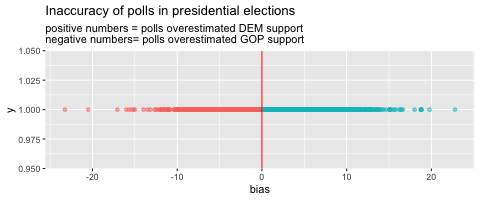

In [40]:
%%R -h 200

# Filter data to polls in presidential general elections only
df_pres_general <- df %>% filter(type_simple=='Pres-G')

# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(df_pres_general) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

#### 👉 Try it

Make some basic changes to this chart
1. set the y axis to the year _(hint: you might need to learn about `factor` in R)_
2. filter the data down to national level presidential general election polls only and plot it on the same dotplot

In [42]:
df['edate'] = pd.to_datetime(df['electiondate'], format='%m/%d/%y')
df['year'] = df['edate'].dt.year
df

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,edate
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,11/3/98,33.16,54.32,-21.15,-9.85,1.0,for New York Daily News | WABC-TV (New York),1998-11-03
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,10/13/98,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,11/3/98,44.69,50.05,-5.36,-9.64,1.0,NaN,1998-11-03
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,Live Phone,D,10/13/98,488.0,Harry Reid,3964,DEM,49.0,John Ensign,3965,REP,44.0,NaN,5.0,11/3/98,47.86,47.77,0.09,4.91,1.0,for unspecified Democratic sponsor,1998-11-03
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/13/98,364.0,Charles E. Schumer,3966,DEM,44.0,Alfonse M. D'Amato,3967,REP,52.0,NaN,-8.0,11/3/98,54.62,44.08,10.54,-18.54,0.0,for New York Daily News | WABC-TV (New York),1998-11-03
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,Live Phone,D,10/13/98,902.0,Charles E. Schumer,3966,DEM,46.0,Alfonse M. D'Amato,3967,REP,42.0,NaN,4.0,11/3/98,54.62,44.08,10.54,-6.54,1.0,for Charles E. Schumer,1998-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,74006,138846,7781,2021,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Trafalgar Group,338,IVR/Online/Text,R,1/3/21,1056.0,Raphael Warnock,14489,DEM,48.4,Kelly Loeffler,13671,REP,49.7,NaN,-1.3,1/5/21,51.04,48.96,2.08,-3.38,0.0,for unspecified Republican sponsor,2021-01-05
10772,73993,138823,8737,2021,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,AtlasIntel,546,Live Phone/Online,NaN,1/3/21,857.0,Jon Ossoff,14567,DEM,51.3,David A. Perdue,14568,REP,46.8,NaN,4.5,1/5/21,50.61,49.39,1.23,3.27,1.0,NaN,2021-01-05
10773,73991,138819,8737,2021,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,National Research Inc.,225,Live Phone,R,1/3/21,500.0,Jon Ossoff,14567,DEM,46.0,David A. Perdue,14568,REP,45.0,NaN,1.0,1/5/21,50.61,49.39,1.23,-0.23,1.0,for unspecified Republican sponsor,2021-01-05
10774,73992,138821,8737,2021,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Opinion Savvy/InsiderAdvantage,243,IVR/Live Phone,NaN,1/3/21,500.0,Jon Ossoff,14567,DEM,48.6,David A. Perdue,14568,REP,48.7,NaN,-0.1,1/5/21,50.61,49.39,1.23,-1.33,0.0,for Fox 5 Atlanta,2021-01-05


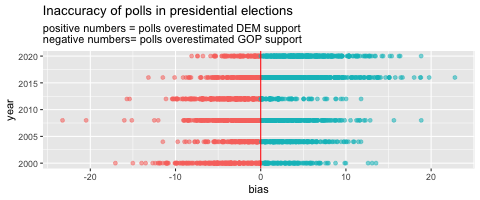

In [45]:
%%R -h 200

# Filter data to polls in presidential general elections only
df_pres_general <- df %>% filter(type_simple=='Pres-G')

# plot the `bias` variable, which shows how far away from the 
# actual result each poll's result was...
ggplot(df_pres_general) +
    aes(x=bias, y=year, color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


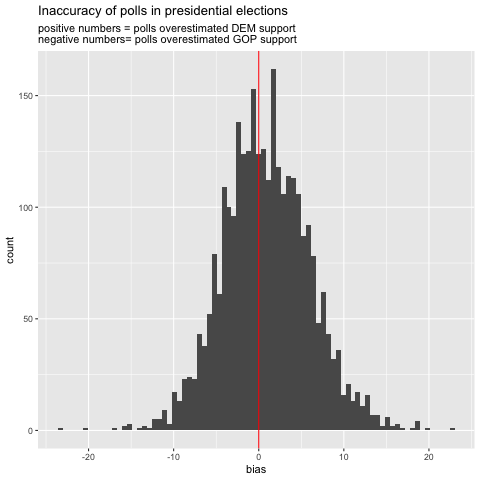

In [11]:
%%R

df_pres_general <- df %>% 
    filter(type_simple=='Pres-G') # Filter data to polls in presidential general elections only

# a basic histogram
ggplot(df_pres_general) +
    aes(x=bias) +
    geom_histogram(bins=80) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [12]:
df.query("type_simple == 'Pres-G' and location=='US'")

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
470,6478,7947,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,10/17/00,1200.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,5.0,-1.0,11/7/00,48.31,47.79,0.51,-1.51,0.0,for Reuters | MSNBC
481,6459,123272,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,NBC News/The Wall Street Journal,221,Live Phone,NaN,10/18/00,600.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,45.0,3.0,-2.0,11/7/00,48.31,47.79,0.51,-2.51,0.0,sample size unavailable; estimated at 600 as a...
482,63601,117065,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/18/00,3750.0,Al Gore,222,DEM,46.0,George W. Bush,241,REP,41.0,NaN,5.0,11/7/00,48.31,47.79,0.51,4.49,1.0,NaN
496,6449,7918,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,ABC News/The Washington Post,3,Live Phone,NaN,10/19/00,1020.0,Al Gore,222,DEM,45.0,George W. Bush,241,REP,47.0,3.0,-2.0,11/7/00,48.31,47.79,0.51,-2.51,0.0,NaN
497,37111,116971,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Fox News/Opinion Dynamics Corp.,104,Live Phone,NaN,10/19/00,900.0,Al Gore,222,DEM,42.0,George W. Bush,241,REP,45.0,4.0,-3.0,11/7/00,48.31,47.79,0.51,-3.51,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10703,72652,136338,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,Research Co.,449,Online,NaN,11/1/20,1025.0,Joseph R. Biden Jr.,13256,DEM,50.0,Donald Trump,13254,REP,42.0,1.0,8.0,11/3/20,51.31,46.86,4.45,3.55,1.0,NaN
10704,72809,136668,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,SurveyMonkey,324,Online,NaN,11/1/20,28240.0,Joseph R. Biden Jr.,13256,DEM,52.0,Donald Trump,13254,REP,46.0,NaN,6.0,11/3/20,51.31,46.86,4.45,1.55,1.0,for Axios
10705,72790,136572,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,Swayable,543,Online,NaN,11/1/20,5174.0,Joseph R. Biden Jr.,13256,DEM,51.8,Donald Trump,13254,REP,46.1,1.7,5.7,11/3/20,51.31,46.86,4.45,1.25,1.0,NaN
10706,72714,136475,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,YouGov,391,Online,NaN,11/1/20,1363.0,Joseph R. Biden Jr.,13256,DEM,53.0,Donald Trump,13254,REP,43.0,NaN,10.0,11/3/20,51.31,46.86,4.45,5.55,1.0,for Economist


### Summary Statistics Refresher

#### Basic summary stats of a column in Python and in R

In [13]:
# Python
df.bias.describe()

count    8824.000000
mean        0.626282
std         6.329518
min       -40.240000
25%        -3.332500
50%         0.680000
75%         4.620000
max        42.940000
Name: bias, dtype: float64

In [14]:
%%R 

df$bias %>% summary()

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-40.2400  -3.3325   0.6800   0.6263   4.6200  42.9400     1952 


#### Basic pivot table in Python and R

In [15]:
pres_df = df.query("type_simple=='Pres-G' & location=='US'")

pres_df.pivot_table(
    index='year', 
    values='bias', 
    aggfunc=['mean','median','std', 'count'])

,mean,median,std,count
,bias,bias,bias,bias
year,,,,
2000,-2.962000,-3.01,3.444909,75
2004,0.916923,1.46,2.514332,65
2008,0.011319,-0.27,2.810690,91
2012,-3.432706,-2.85,2.305543,85
2016,1.552308,1.65,3.361668,78
2020,3.829681,4.05,2.944325,94


In [16]:
%%R

pres_df <- df %>% 
    filter(type_simple=='Pres-G') %>%
    filter(location=='US')
    
    
pres_df %>%
  group_by(year) %>%
  summarise(mean = mean(bias),
           median = median(bias),
           stdev = sd(bias),
           num_polls=n())

# A tibble: 6 × 5
   year    mean median stdev num_polls
  <dbl>   <dbl>  <dbl> <dbl>     <int>
1  2000 -2.96    -3.01  3.44        75
2  2004  0.917    1.46  2.51        65
3  2008  0.0113  -0.27  2.81        91
4  2012 -3.43    -2.85  2.31        85
5  2016  1.55     1.65  3.36        78
6  2020  3.83     4.05  2.94        94
